# Setup

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Linear regression using the Normal Equation

계산으로 적당한 theta 값 구하기 

In [4]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100,1)

[0, 2, 0, 15]

Saving figure generated_data_plot


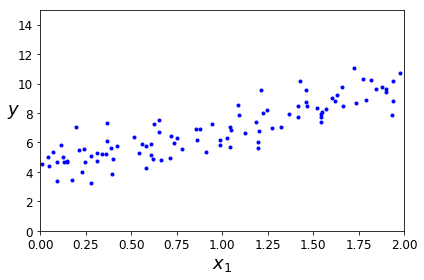

In [5]:
plt.plot(x, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [6]:
X_b = np.c_[np.ones((100, 1)), x]  # add x0 = 1 to each instance
# np.linalg.inv 역행렬 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_b[:3]
theta_best

array([[ 1.        ,  0.74908024],
       [ 1.        ,  1.90142861],
       [ 1.        ,  1.46398788]])

array([[ 4.21509616],
       [ 2.77011339]])

In [7]:
# 새로운 값으로 예측하기 
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

[0, 2, 0, 15]

Saving figure linear_model_predictions


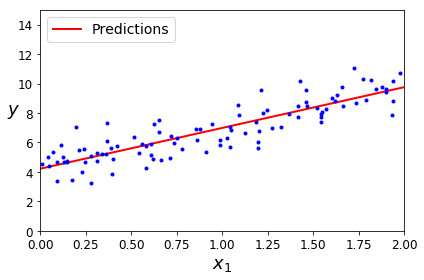

In [8]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions")
plt.show()

In [9]:
# LinearRegression 모듈을 이용하여 구하기 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

(array([ 4.21509616]), array([[ 2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293]])

# Linear regression using batch gradient descent

* Gradient Descent : 최적화 알고리즘, cost funting 을 minimize 하도록 반복해서 파라미터를 변경 해줌

    Learning rate 조절 중요

    MSE cost funtion 은 convex funtion 이여서 gobal min 이 하나 이다. 

    features 가 다른 scale 을 갖을 수록 training 에 수렵하는데 오래 걸릴 수 있다. 
    more parameter, more demension 까다롭다. 


* partical derivative : 편미분을 사용하여 비용함수가 얼마나 달라지는지 확인

수십만개의 features을 학습시키기엔 normal equation 보다 gradient descent 가 가 훨씬 빠르다.


In [11]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    

In [12]:
X_new_b.dot(theta)

array([[ 4.21509616],
       [ 9.75532293]])

Saving figure gradient_descent_plot


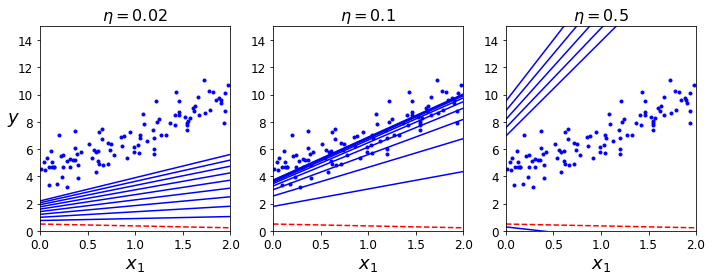

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(x, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

theta 값에 따라 도달하지 못할수도 너무 발산해 버릴수도 있다. 
--- start 지점 

# Stochastic Gradient Descent

random instance 를 사용하여 sindle instance 마다 gradient 를 계산함

빠르지만 수렴하지 않고 최소점을 머문다.

learning rate 를 수렴에 가까이 할수록 작게 변환해줌 

eta = learning_schedule(epoch * m + i)

In [15]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

[0, 2, 0, 15]

Saving figure sgd_plot


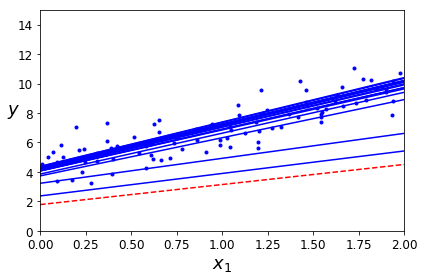

In [20]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(x, y, "b.");                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
save_fig("sgd_plot")                                 
plt.show()                                           

In [21]:
theta

array([[ 4.19661325],
       [ 2.76618966]])

In [25]:
# SGDRegressor 를 이용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(x, y.ravel()) # Mini-batch gradient descent
sgd_reg.intercept_, sgd_reg.coef_

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=False)

(array([ 4.16782089]), array([ 2.72603052]))

In [33]:
#y.ravel()#Return a flattened array.
tmp = np.array([[12,23],[11,11]])
tmp.ravel()

array([12, 23, 11, 11])

# Mini-batch gradient descent

small random sets 를 돌려 gradient 를 계산 함 


In [34]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        # minibatch_size 만큼의 instance 사용 
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [35]:
theta
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

array([[ 4.25214635],
       [ 2.7896408 ]])

[2.5, 4.5, 2.3, 3.9]

Saving figure gradient_descent_paths_plot


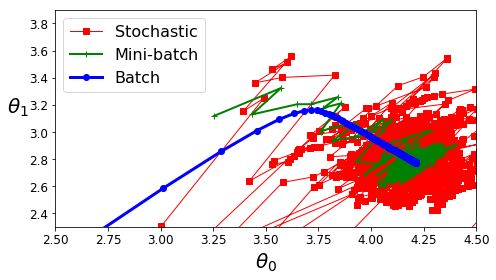

In [36]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

# Polynomial regression

다항회귀

각 피처기능을 새ㅗㄹ운 피처에 추가 혹장된 피처 선형 교육을 함 



In [39]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

[-3, 3, 0, 10]

Saving figure quadratic_data_plot


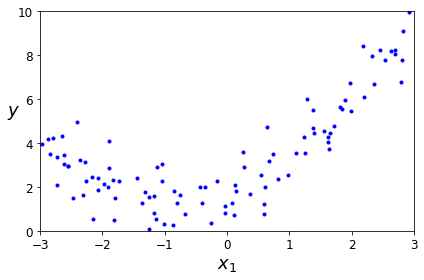

In [40]:
# 샘플 데이터
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# 다항 회귀 값 구함 
X_poly = poly_features.fit_transform(X)
X[0] # 원본
X_poly[0] # x**2 feature 추가 

array([-0.75275929])

array([-0.75275929,  0.56664654])

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# 실제 값과 유사함 y = 0.5x**2 + 1.0x + 2.0 (0.56x**2+0.93x+1.78)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

(array([ 1.78134581]), array([[ 0.93366893,  0.56456263]]))

[-3, 3, 0, 10]

Saving figure quadratic_predictions_plot


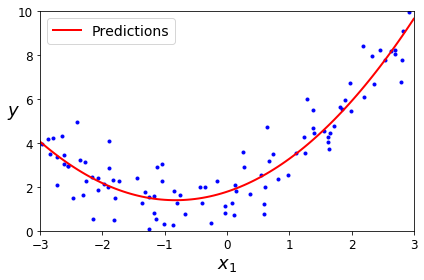

In [45]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

다항 feature 값이 많을 수록 조합이 많아져 계산이 오래 거림 

a, b 두개의 feature 에 3 degree 를 주게되면 $a^2, a^3, b^2, b^3 또는 ab, a^2 b, ab^2$ 가능하다. 

# Learning Curves

Pipeline(steps=(('poly_features', PolynomialFeatures(degree=300, include_bias=False, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))))

Pipeline(steps=(('poly_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))))

Pipeline(steps=(('poly_features', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))))

[-3, 3, 0, 10]

Saving figure high_degree_polynomials_plot


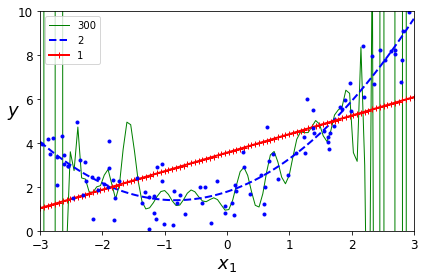

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# degree : 300, 2, 1로 설정 
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline((
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ))
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

degree 가 1인 경우 underfitting, 300 인 경우 너무 overfitting 이 됨 

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)    
 

[0, 80, 0, 3]

Saving figure underfitting_learning_curves_plot


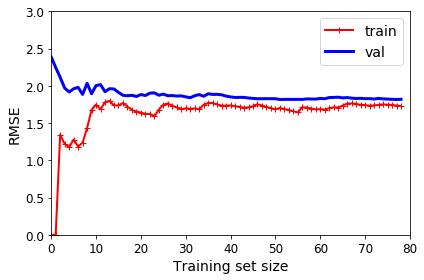

In [49]:
# LinearRegression 모델을 활용하여 learining curve 확인 
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()     

처음에는 완벽이 맞는듯 싶지만 training set size 가 아무리 커져도 training set 과 validation set의 사이가 줄어들지 않는다. 

underfitting model

[0, 80, 0, 3]

Saving figure learning_curves_plot


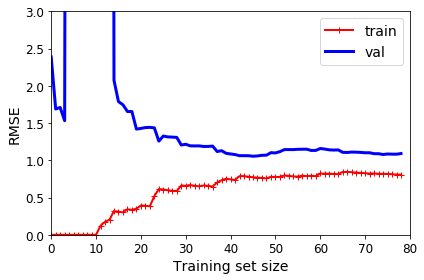

In [50]:
# 다항회귀를 이용한 learning curve 확인 
from sklearn.pipeline import Pipeline

# degree=10 
polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ))

plot_learning_curves(polynomial_regression, x, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()   

** THE BIAS/VARIANCE TRADEOFF ** 

지도 학습 알고리즘이 트레이닝 셋의 범위를 넘어 지나치게 일반화 하는 것을 예방하기 위해 두 종류의 오차(편향, 분산)를 최소화 할 때 겪는 문제

* Bias <br>
    학습 알고리즘에서 잘못된 가정을 했을 때 발생하는 오차이다. 높은 편향값은 알고리즘이 데이터의 특징과 결과물과의 적절한 관계를 놓치게 만드는 과소적합(underfitting) 문제를 발생 시킨다.
    
* Variance  <br>
    트레이닝 셋에 내재된 작은 변동(fluctuation) 때문에 발생하는 오차이다. 높은 분산값은 큰 노이즈까지 모델링에 포함시켜버리는 과적합(overfitting) 문제를 발생 시킨다.

    
* Irreducible error  <br>
    This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).  noise는 데이터가 가지는 본질적인 한계치
    
    
Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff.

# Regularized Linear Models

정규화로 overfitting 을 줄임 

모델의 가중치를 제한

## Ridge Regression

cost function 에 regularization term 을 추가 <br>
모델 가중치를 가능한 작게 유지하도록 함 

feature 들 사이에 다중공산성을 줄여줌 (회귀계수 축소, 복잡도 줄임)

* 데이터의 scale 에 민감하다. 


Saving figure ridge_regression_plot


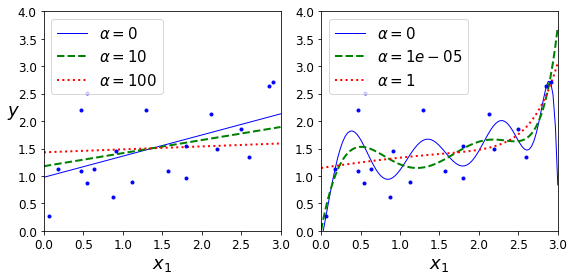

In [51]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline((
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ))
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

In [52]:
# Ridge 모듈 이용 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='cholesky', tol=0.001)

array([[ 1.55071465]])

In [53]:
# penalty="l2" 를 이용하여 SGD 를 이용한 Ridge 구현 
# regularization term 추가 weight 에 표준 제곱의 반 
sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=False)

array([ 1.13500145])

In [54]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='sag', tol=0.001)

array([[ 1.5507201]])

## Lasso Regression

영향력이 적은 회귀계숙 값을 0으로 만듬 (해석력이 올라가고 예측 정확도 증가)

Saving figure lasso_regression_plot


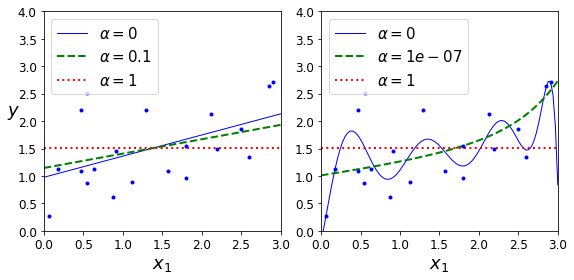

In [55]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

save_fig("lasso_regression_plot")
plt.show()

a = 1e-07 일때 ridge 와 많이 다른 모양을 띔

* Lasso VS Ridge regularization

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [57]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

[-1, 3, -1.5, 1.5]

[-1, 3, -1.5, 1.5]

[-1, 3, -1.5, 1.5]

[-1, 3, -1.5, 1.5]

Saving figure lasso_vs_ridge_plot


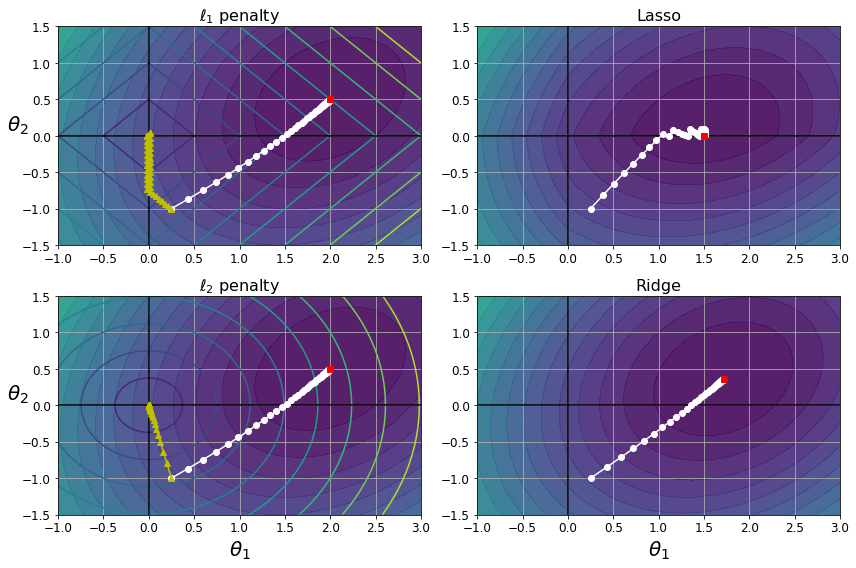

In [58]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])

for subplot in (221, 223):
    plt.subplot(subplot)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

for subplot in (223, 224):
    plt.subplot(subplot)
    plt.xlabel(r"$\theta_1$", fontsize=20)

save_fig("lasso_vs_ridge_plot")
plt.show()

In [59]:
# lasso 모듈 이용 
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

array([ 1.53788174])

##  Elastic Net

Ridge 와 Lasso 의 중간 

r=0 이면 lasso, r=1 이면 ridge

Ridge is a good 

몇가지의 feature 만이 영향력이 있다고 판단된다면 Lasso or Elastic Net 사용, 
불필요한 feature 들의 weight 을 줄여주거나 zero 로 만들어 준다.

주로 elatic net 을 사용한다. Lasso 는 feature 가 너무 많을 때나 상관성이 높을떄 괴상하게 동작 할수 있다. 

In [60]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

array([ 1.54333232])

## Early Stopping

validation error 가 최저점에 도달할때 training 을 stop 시켜서 regularize 를 함 

stochastic and mini-batch gradient descent 를 하면 curve 가 smooth 하지 않을 수 있다. 최저점을 지나서 stop 될때엔 rollback 을 하여 최저점으로 이동 시킨다. 


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

Saving figure early_stopping_plot


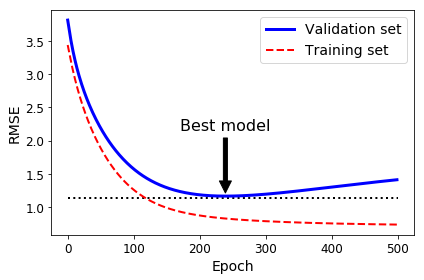

In [62]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline((
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train);
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [63]:
from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=True)

In [64]:
best_epoch, best_model

(239, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, verbose=0, warm_start=True))

# Logistic regression

분류 

## Estimating Probabilities

input feature 들의 합의 weigth 를 구함 

sigmoid function 을 이용 

## Training and Cost Function

* Equation 4-16. Cost function of a single training instance

<img src='4logistic0.png'/>


* Equation 4-17. Logistic Regression cost function (log loss)

<img src='4logistic1.png'/>

[-10, 10, -0.1, 1.1]

Saving figure logistic_function_plot


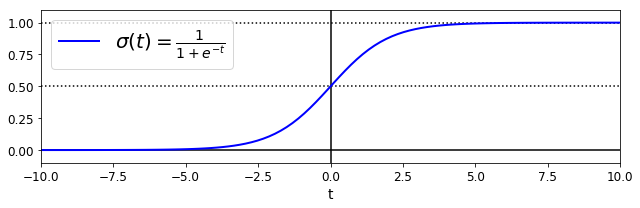

In [65]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

In [66]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [68]:
print(iris.DESCR)
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## Decision Boundaries


In [69]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

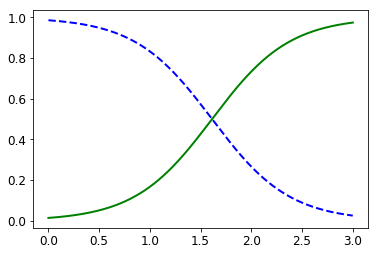

In [70]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

[0, 3, -0.02, 1.02]

Saving figure logistic_regression_plot


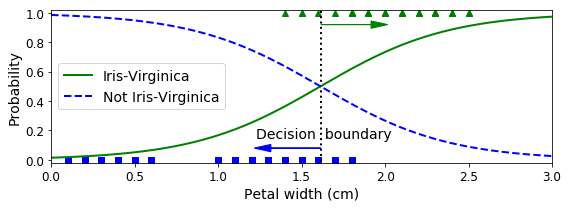

In [71]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [72]:
decision_boundary
log_reg.predict([[1.7], [1.5]])

array([ 1.61561562])

array([1, 0])

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

<a list of 6 text.Text objects>

[2.9, 7, 0.8, 2.7]

Saving figure logistic_regression_contour_plot


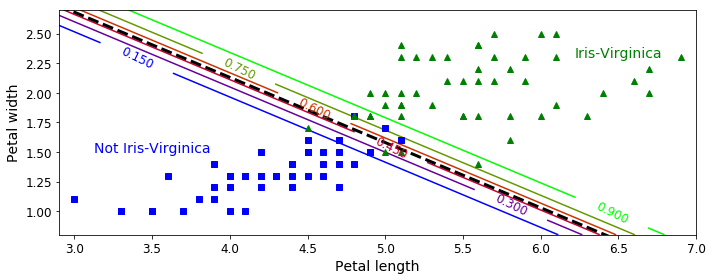

In [73]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

logistic regression 모델은 alpha 대신 c 를 사용.

C=10^10 c가 높아 질 수록 model의 regularize가 덜된다. 

## Softmax Regression

Logistic Regression 은 multiple binary classifiers 를 결합하여 multiple classes directly 를 지원한다. 

* cross-entorpy 

target class 와 class probabilities 를 비교할때 사용 

log 함수를 이용해 one hot 으로 만들어 줌 0 또는 inf 

<img src="4cross.png"/>

In [75]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

multinomial 옵션으로 multi class 를 사용 (LogisticRegression one-versus-all : 2가지 이상의 클래스 분류의 기본값)

C=10 로 weight 값을 정규화 시킴 

<a list of 6 text.Text objects>

[0, 7, 0, 3.5]

Saving figure softmax_regression_contour_plot


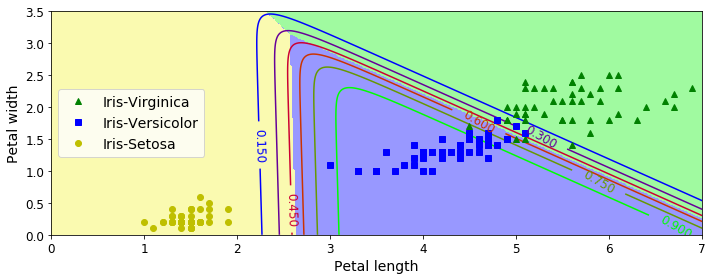

In [76]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()